In [1]:
%reset -f

In [2]:
## 0) 필기체 데이터 가져오기
 
import numpy as np
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam


#데이터 로드

(x_train, y_train) , (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


2024-04-12 03:54:07.008236: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

#1-1 ) lenet-5 신경망 모델 설계 add 함수 사용
#신경망 설계
cnn_layers=[
    Conv2D(6, kernel_size=(5,5),padding ='same',
            activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
]

cnn_model = Sequential(cnn_layers)
cnn_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-12 03:54:08.309722: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 03:54:08.312817: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-12 03:54:08.312839: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-1

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        33,684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,106 (144.95 KB)

 Trainable params: 37,106 (144.95 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
##2) 신경망 모델 학습
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

hist = cnn_model.fit(
    x_train, y_train,
    batch_size=256,
    validation_data=(x_test, y_test),
    epochs=30,
    verbose=0
)

I0000 00:00:1712894049.621433   10163 service.cc:145] XLA service 0x7fb5140014c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712894049.621464   10163 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2024-04-12 03:54:09.636252: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-12 03:54:09.704563: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1712894051.392579   10163 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [5]:
##3) 신경망 모델 평가
result = cnn_model.evaluate(x_test, y_test)
print("Acc:",result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.9803 - loss: 0.1135
Acc: [0.09145889431238174, 0.9833999872207642]


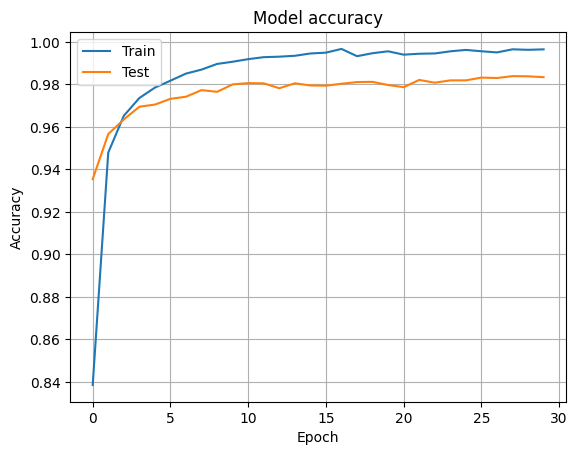

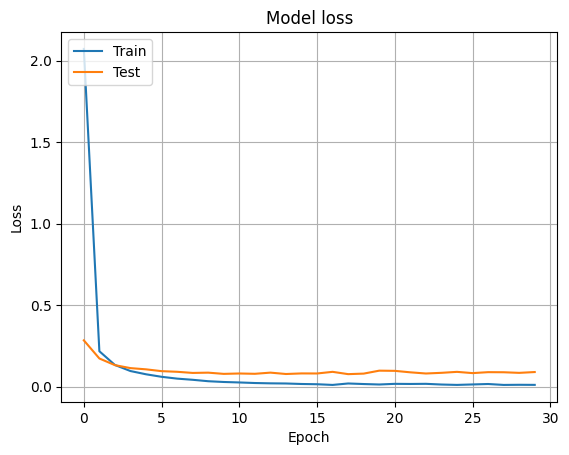

In [6]:

#show the accruacy graph
import matplotlib.pyplot as plt

# 모델 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 모델 손실 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# 격자 추가
plt.grid(True)

plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





In [7]:
%reset -f 